# Reinforcement Learning

# Dynamic programming

This notebook presents policy iteration and value iteration for finding the optimal policy.

Note that these techniques require the enumeration of all states and thus apply to a few models only (e.g., walk, Tic-Tac-Toe, Nim).

In [1]:
import numpy as np

In [2]:
from model import Maze, TicTacToe, Nim
from agent import Agent
from dp import PolicyEvaluation, PolicyIteration, ValueIteration

## Maze

In [3]:
maze_map = np.load('maze.npy')

In [4]:
model = Maze()
init_state = (1, 0)
exit_state = (1, 20)
model.set_parameters(maze_map, init_state, [exit_state])
model = Maze()

In [6]:
states = model.get_states()

In [7]:
len(states)

105

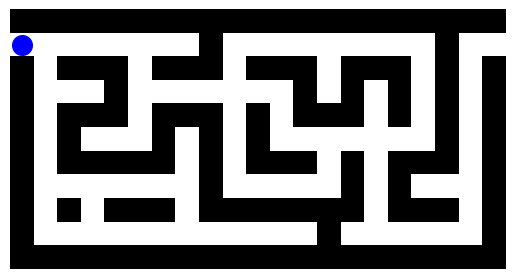

In [8]:
model.display()

## Policy Evaluation

Policy evaluation relies on Bellman's equation.

In [9]:
# let's start with the random policy
agent = Agent(model)
policy = agent.policy

In [10]:
# policy evaluation
algo = PolicyEvaluation(model, policy)
values = algo.get_values()

In [11]:
len(values)

105

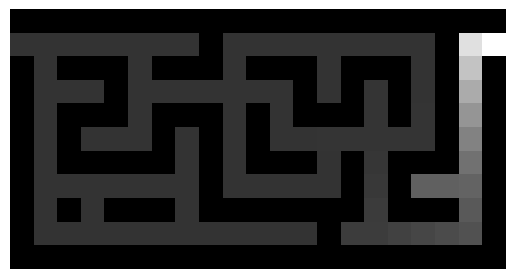

In [12]:
model.display_values(values)

In [13]:
# policy improvement
new_policy = algo.improve_policy()

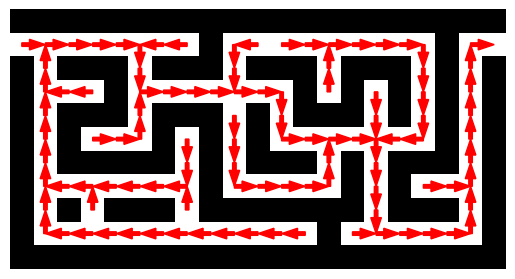

In [14]:
model.display_policy(new_policy)

In [15]:
# let's test this new policy
agent = Agent(model, new_policy)
stop, states, rewards = agent.get_episode()

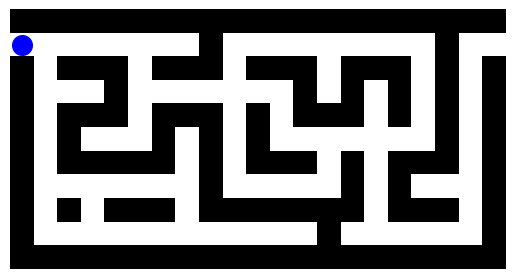

In [16]:
animation = model.display(states)

In [17]:
animation

## Policy Iteration

In general, several iterations of policy evaluation / policy improvement are necessary. Below is the Policy Iteration method.

In [18]:
algo = PolicyIteration(model, n_iter_eval=1000)

Convergence after 22 iterations.


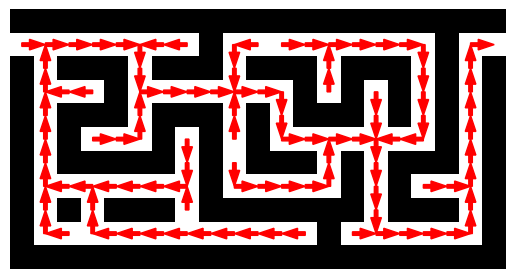

In [19]:
policy = algo.get_optimal_policy()
model.display_policy(policy)

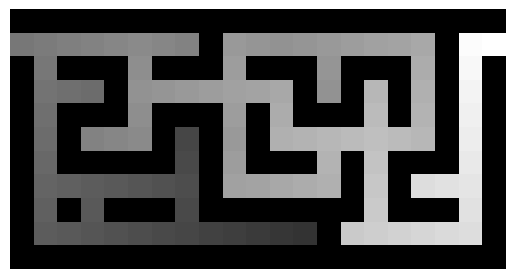

In [20]:
values = algo.values
model.display_values(values)

## Value Iteration

Value iteration relies on Bellman's optimality equation. 

## To do

Check the code of ``ValueIteration``.
* Complete the method ``get_optimal_policy`` and test it on the maze.
* Complete the method ``get_optimal_policy_game`` and test it on the Tic-Tac-Toe. Note that both the player and the adversary are optimized.

In [21]:
algo = ValueIteration(model)

Convergence after 1 iterations.


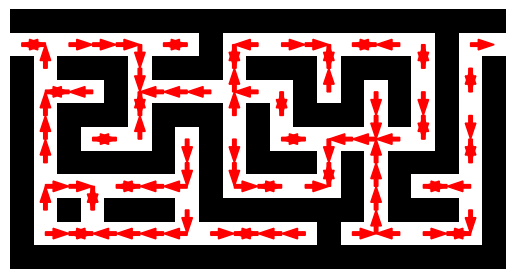

In [22]:
policy = algo.get_optimal_policy()
model.display_policy(policy)

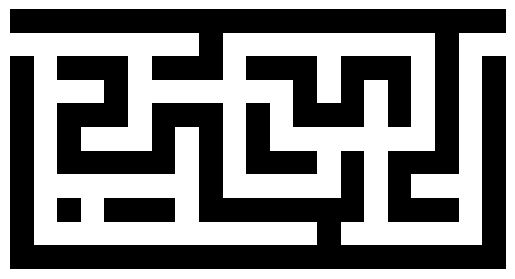

In [23]:
values = algo.values
model.display_values(values)

## Questions

* What is the outcome of Tic-Tac-Toe with perfect players?
* Display a typical game against two perfect players.
* What is the outcome of Tic-Tac-Toe for a perfect player against a random player?
* Do the same for Nim.

In [24]:
Game = TicTacToe

In [25]:
# first player
game = Game()
algo = ValueIteration(game)
policy = algo.get_optimal_policy_game()

Convergence after 1 iterations.


In [26]:
# adversary
game = Game(play_first=False, player=-1)
algo = ValueIteration(game)
adversary_policy = algo.get_optimal_policy_game()

Convergence after 1 iterations.


In [27]:
# playing together 
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()

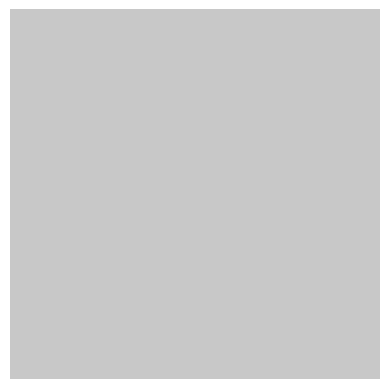

In [28]:
animation = game.display(states)

In [29]:
animation